In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_td = pd.read_csv(mouse_drug_data_to_load)
clinical_td = pd.read_csv(clinical_trial_data_to_load)

In [32]:
mouse_td.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [33]:
clinical_td.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [34]:
# Combine the data into a single dataset
merge_data = pd.merge(clinical_td, mouse_td, on = 'Mouse ID', how='outer')

# Display the data table for preview

merged_df = merge_data[(merge_data["Drug"] == 'Capomulin') |
                      (merge_data["Drug"] == 'Infubinol') |
                      (merge_data["Drug"] == 'Ketapril') |
                      (merge_data["Drug"] == 'Placebo')
                     ]
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [35]:

merged_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug                   object
dtype: object

# Tumor Response to Treatment

In [36]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and create dataframe
mean_tumor_vol = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])

In [37]:
# Preview to DataFrame
mean_tumor_vol = pd.pivot_table(merged_df, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
mean_tumor_vol

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [38]:
# Create dataframe to store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvol_sem = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])

In [39]:
# Reshape & preview DataFrame
tumorvol_sem = pd.pivot_table(merged_df, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
tumorvol_sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


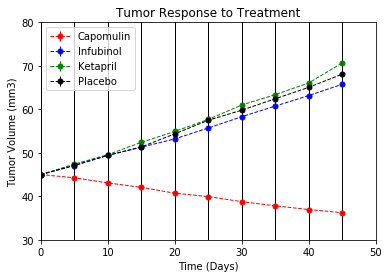

In [40]:
# Generate the Plot with Error Bars (tumor volume changes over time for each treatment)


plt.errorbar(mean_tumor_vol.index, mean_tumor_vol['Capomulin'], yerr=tumorvol_sem['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=1)

plt.errorbar(mean_tumor_vol.index, mean_tumor_vol['Infubinol'], yerr=tumorvol_sem['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=1)

plt.errorbar(mean_tumor_vol.index, mean_tumor_vol['Ketapril'], yerr=tumorvol_sem['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=1)

plt.errorbar(mean_tumor_vol.index, mean_tumor_vol['Placebo'], yerr=tumorvol_sem['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=1)
plt.xlim(0,50)
plt.ylim(30,80)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='upper left')

# Save the Figure
plt.savefig('tumorvolume_time.png')

In [41]:

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [42]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metasite = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])

In [43]:
# Reshape and preview DataFrame
metastatic_response= mean_metasite.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metastatic_response

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [44]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metasite_se = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])

In [45]:
# Reshape and preview dataframe
metastatic_response_sem = metasite_se.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites') 
metastatic_response_sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


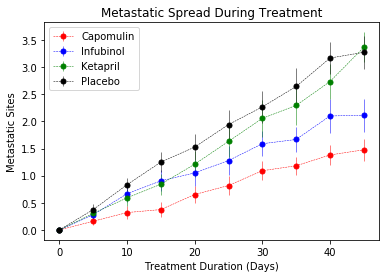

In [46]:
# Generate the Plot with Error Bars (the number of metastatic sites changes over time for each treatment)
plt.errorbar(metastatic_response.index, metastatic_response['Capomulin'], yerr=metastatic_response_sem['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response.index, metastatic_response['Infubinol'], yerr=metastatic_response_sem['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response.index, metastatic_response['Ketapril'], yerr=metastatic_response_sem['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response.index, metastatic_response['Placebo'], yerr=metastatic_response_sem['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='upper left')

# Save the Figure
plt.savefig('metasiteschangesovertime.png')
# Show the Figure
plt.show()

## Survival Rates


In [47]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID'])

In [48]:
# Preview the Data Frame
Survival_rates = pd.pivot_table(mice_count, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = np.mean)
Survival_rates

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [49]:
# Preview survival rate dataframe in precentage
Survival_percentage = Survival_rates.copy()
Survival_percentage = round(Survival_percentage.apply(lambda c: c / c.max() * 100, axis=0),2)
Survival_percentage

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


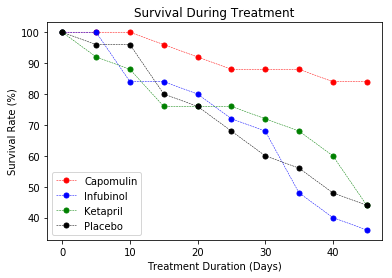

In [50]:
# Create plot a scatter plot showing the number of mice and their survival rate

plt.errorbar(Survival_percentage.index, Survival_percentage['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Survival_percentage.index, Survival_percentage['Infubinol'], 
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Survival_percentage.index, Survival_percentage['Ketapril'], 
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Survival_percentage.index, Survival_percentage['Placebo'], 
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc='lower left')

# Save the Figure
plt.savefig('survivalrate_micecount.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [51]:
# Calculate the percent changes for each drug
tvol_change_percent =  ((mean_tumor_vol.iloc[-1]-mean_tumor_vol.iloc[0])/mean_tumor_vol.iloc[0]) * 100
# Display the data to confirm
tvol_change_percent

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [52]:
tvol_change_percent
drug = list(tvol_change_percent.index)
drug

['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

In [53]:
# Store all Relevant Percent Changes into a Tuple
tvol_change_data = tvol_change_percent.tolist()
tvol_change_data

[-19.475302667894155, 46.12347172785184, 57.02879468660604, 51.29796048315153]

In [56]:
# Indicate colors: red for tumor growth and green for tumor reduction
colors  =  ['r'  if  tpc  >  0  else  'g'  for  tpc  in  tvol_change_data]
colors

['g', 'r', 'r', 'r']

In [57]:
x_axis = np.arange(len(tvol_change_data))
x_axis

array([0, 1, 2, 3])

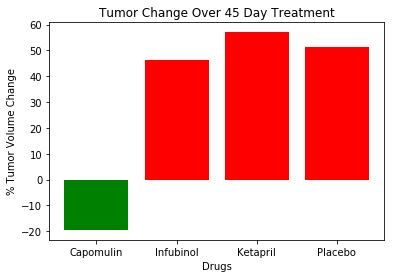

In [58]:
# Plot bar graph
plt.bar(x_axis, tvol_change_data, color = colors, align="center")

# Label bars on the bar graph
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, tvol_change_percent.index)

# Label chart
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

# Save the Figure
plt.savefig("tumor_vol_change.png")

# Show the Figure
plt.show()